In [1]:
# changin colorspaces
import cv2
import numpy as np

In [3]:
# track color that we use in HSV space
red = np.uint8([[[0,0,255]]])
print(red.shape)
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print(hsv_red)

(1, 1, 3)
[[[  0 255 255]]]


In [4]:
# object tracking based on object space range
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

In [4]:
# geometric transformations of images
## scaling
img1 = cv2.imread('../data/messi5.jpg')
res = cv2.resize(img1,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('../data/messi5_scaling.jpg', res)
print(img1.shape, res.shape)

(342, 548, 3) (684, 1096, 3)


In [4]:
## scaling
height, width = img1.shape[:2]
res = cv2.resize(img1, (2*width,2*height), interpolation = cv2.INTER_CUBIC)
print(res.shape)

(684, 1096, 3)


In [5]:
# translation
rows,cols,channes = img1.shape
M = np.float32([[1,0,-100],[0,1,50]])
dst = cv2.warpAffine(img1, M, (cols,rows))

cv2.imwrite('../data/messi5_translation.jpg', dst)

True

In [6]:
#rotate
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),360,1)
dst = cv2.warpAffine(img1,M,(cols,rows))
cv2.imwrite('../data/messi5_rotation.jpg',dst)

True

In [7]:
#rotate
dst = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imwrite('../data/messi5_rotation.jpg',dst)

True

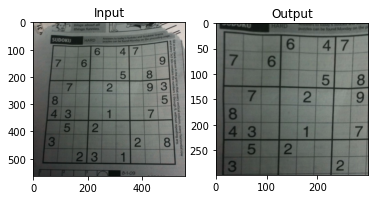

In [8]:
from matplotlib import pyplot as plt
img2 = cv2.imread('../data/sudoku.png')
rows,cols,ch = img2.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img2,M,(300,300))
plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

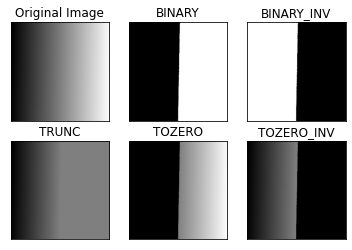

In [9]:
from matplotlib import pyplot as plt

img = cv2.imread('../data/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

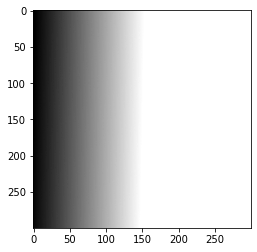

In [10]:
from matplotlib import pyplot as plt

img = cv2.imread('../data/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh1,'gray')

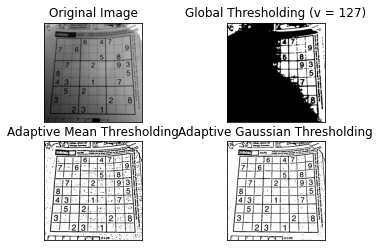

In [12]:
# adaptive thresholding
from matplotlib import pyplot as plt

img = cv2.imread('../data/sudoku.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

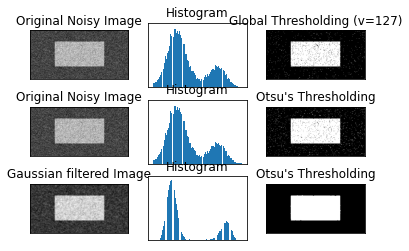

In [3]:
# otsu's binarization
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/noisy2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## smoothing images

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


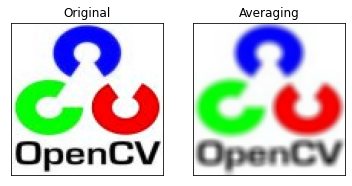

In [8]:
img = cv.imread('../data/opencv_logo.jpg')
kernel = np.ones((5,5),np.float32)/25
print(kernel)
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## guassian blurring

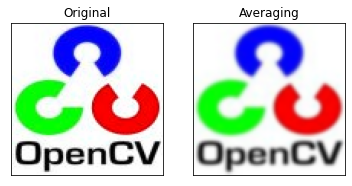

In [10]:
img = cv.imread('../data/opencv_logo.jpg')
dst = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## median blurring

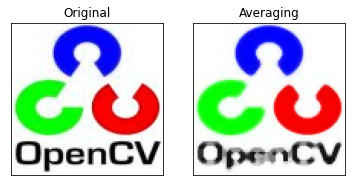

In [12]:
img = cv.imread('../data/opencv_logo.jpg')
dst = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## bilateral filtering

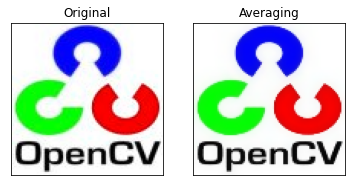

In [13]:
img = cv.imread('../data/opencv_logo.jpg')
dst = cv.bilateralFilter(img, 9 ,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# morphological transformations

## erosion

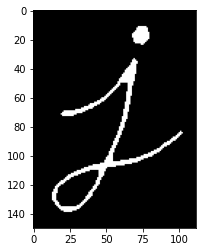

In [21]:
img = cv2.imread('../data/j.png', 0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,'gray')

# dilation

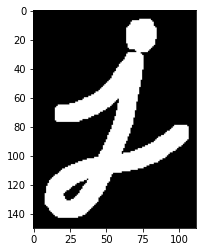

In [23]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,'gray')

## opening

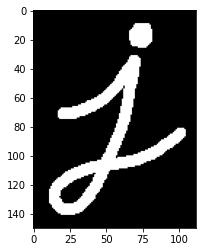

In [25]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,'gray')

## closing

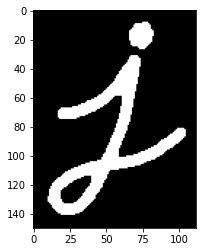

In [27]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,'gray')

## morphological gradient

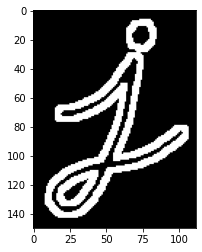

In [29]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient,'gray')

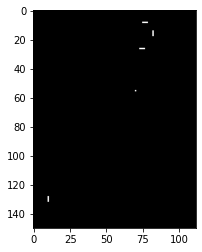

In [30]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.imshow(tophat,'gray')

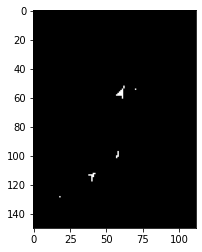

In [31]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat,'gray')

In [35]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [34]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [36]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

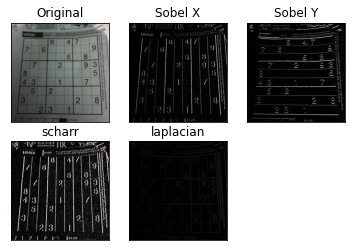

In [46]:
img = cv.imread('../data/sudoku.png')
kernel1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
scharr_kernel = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
laplacian_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
dst1 = cv.filter2D(img,-1,kernel1)
dst2 = cv.filter2D(img,-1,kernel2)
dst3 = cv.filter2D(img,-1,scharr_kernel)
dst4 = cv.filter2D(img,-1,laplacian_kernel)
plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dst1),plt.title('Sobel X')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(dst2),plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(dst3),plt.title('scharr')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(dst4),plt.title('laplacian')
plt.xticks([]), plt.yticks([])
plt.show()

## data type when using kernels

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

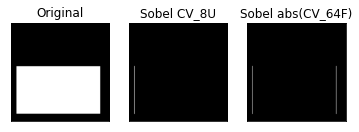

In [6]:
img = cv.imread('../data/box.png',0)

#Output dtype = cv.CV_8U
sobel1_8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)

#output dtype = cv.cv_64f, then take its absolute and convert it to cv.cv_8u
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel2_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobel1_8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel2_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

# canny edge detection

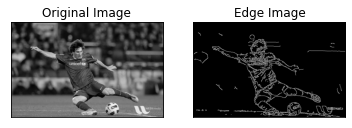

In [8]:
img = cv.imread('../data/messi5.jpg',0)
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()